EXP6

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
# 프로젝트: 멋진 작사가 만들기

import glob
import tensorflow

#print(glob.__version__)
print(tensorflow.__version__)

2.8.0


In [4]:
import glob
import os
#!pwd

txt_file_path = os.getcwd()+"/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/*.txt"
#print(os.getcwd())

txt_list = glob.glob(txt_file_path)
print(txt_list)
raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

['/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/joni-mitchell.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/disney.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/kanye-west.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/nicki-minaj.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/nickelback.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/jimi-hendrix.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/paul-simon.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/radiohead.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/missy-elliott.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/dolly-parton.txt', '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp6-input/lyrics/dr-seuss.

In [5]:
import re 
# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
# 이 순서로 처리해주면 문제가 되는 상황을 방지할 수 있겠네요!
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


In [6]:
# 여기에 정제된 문장을 모을겁니다
corpus = []

for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뜁니다
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    # 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# 정제된 결과를 10개만 확인해보죠
corpus[:10]

['<start> just before our love got lost you said <end>',
 '<start> i am as constant as a northern star and i said <end>',
 '<start> constantly in the darkness <end>',
 '<start> where s that at <end>',
 '<start> if you want me i ll be in the bar on the back of a cartoon coaster <end>',
 '<start> in the blue tv screen light <end>',
 '<start> i drew a map of canada <end>',
 '<start> oh canada <end>',
 '<start> and i sketched your face on it twice oh you are in my blood like holy wine <end>',
 '<start> you taste so bitter <end>']

In [7]:
import tensorflow as tf
# 토큰화 할 때 텐서플로우의 Tokenizer와 pad_sequences를 사용합니다
# 더 잘 알기 위해 아래 문서들을 참고하면 좋습니다
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def tokenize(corpus):
    # 12000 단어를 기억할 수 있는 tokenizer를 만들겁니다
    # 우리는 이미 문장을 정제했으니 filters가 필요없어요
    # 12000 단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                           maxlen=15,
                                                           padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2   35  185 ...    0    0    0]
 [   2    5  151 ...    3    0    0]
 [   2 4179   14 ...    0    0    0]
 ...
 [   2   49    3 ...    0    0    0]
 [   2   39    4 ...    0    0    0]
 [   2   49    3 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7fd6d288c8d0>


In [8]:
#생성된 텐서 데이터를 3번째 행, 10번째 열까지만 출력해 봅시다.
print(tensor[:3, :10])

[[   2   35  185  155   33   41  332    7  107    3]
 [   2    5  151   81 4376   81    9 5629  503    8]
 [   2 4179   14    6 1299    3    0    0    0    0]]


In [9]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2  35 185 155  33  41 332   7 107   3   0   0   0   0]
[ 35 185 155  33  41 332   7 107   3   0   0   0   0   0]


In [10]:
from sklearn.model_selection import train_test_split

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size=0.2, shuffle= True, random_state= 1)

In [11]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(256, 14), dtype=tf.int32, name=None), TensorSpec(shape=(256, 14), dtype=tf.int32, name=None))>

In [12]:

class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, activation='relu', return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 128
hidden_size = 512
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [13]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 4.15842187e-05, -2.22872768e-05, -6.76756899e-05, ...,
         -3.97178628e-05, -6.97288342e-05,  5.75243648e-05],
        [ 9.82242709e-05,  2.11547813e-05, -1.12287335e-05, ...,
         -1.84785851e-04, -4.90492057e-05,  6.38150013e-05],
        [ 2.27055978e-04,  2.42815167e-05, -1.16236533e-05, ...,
         -2.44586961e-04, -1.22585087e-04,  9.05500565e-05],
        ...,
        [ 6.77112781e-04, -1.64748146e-03, -9.33694246e-04, ...,
         -1.14233419e-03, -1.54577883e-05, -1.46940016e-04],
        [ 6.12364383e-04, -1.84252148e-03, -1.02752086e-03, ...,
         -1.26208935e-03,  2.49427630e-05, -2.07559846e-04],
        [ 5.33432001e-04, -2.00604554e-03, -1.09875202e-03, ...,
         -1.37552433e-03,  6.66561682e-05, -2.64391419e-04]],

       [[ 4.15842187e-05, -2.22872768e-05, -6.76756899e-05, ...,
         -3.97178628e-05, -6.97288342e-05,  5.75243648e-05],
        [ 1.19893200e-04, -4.45179503e-05, -1

In [14]:
model.summary()

Model: "text_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  1536128   
                                                                 
 lstm (LSTM)                 multiple                  1312768   
                                                                 
 lstm_1 (LSTM)               multiple                  2099200   
                                                                 
 dense (Dense)               multiple                  6156513   
                                                                 
Total params: 11,104,609
Trainable params: 11,104,609
Non-trainable params: 0
_________________________________________________________________


In [15]:
# optimizer와 loss등은 차차 배웁니다
# 혹시 미리 알고 싶다면 아래 문서를 참고하세요
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# 양이 상당히 많은 편이니 지금 보는 것은 추천하지 않습니다
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)

history= model.fit(enc_train, dec_train,
          epochs=10,
          validation_data=(enc_val,dec_val),
          batch_size=256,
          verbose=1)

Epoch 1/10
550/550 [==============================] - 46s 75ms/step - loss: 4.6225 - val_loss: 4.4277
Epoch 2/10
550/550 [==============================] - 41s 74ms/step - loss: 4.4411 - val_loss: 4.3349
Epoch 3/10
550/550 [==============================] - 41s 74ms/step - loss: 4.2133 - val_loss: 4.1303
Epoch 4/10
550/550 [==============================] - 34s 62ms/step - loss: 4.4185 - val_loss: 4.6896
Epoch 5/10
550/550 [==============================] - 34s 61ms/step - loss: 4.2662 - val_loss: 4.1765
Epoch 6/10
550/550 [==============================] - 33s 61ms/step - loss: 3.9969 - val_loss: 3.9470
Epoch 7/10
550/550 [==============================] - 33s 61ms/step - loss: 3.9321 - val_loss: 3.9049
Epoch 8/10
550/550 [==============================] - 33s 61ms/step - loss: 3.7244 - val_loss: 3.5306
Epoch 9/10
550/550 [==============================] - 33s 61ms/step - loss: 3.4092 - val_loss: 3.3826
Epoch 10/10
550/550 [==============================] - 33s 61ms/step - loss: 3.256

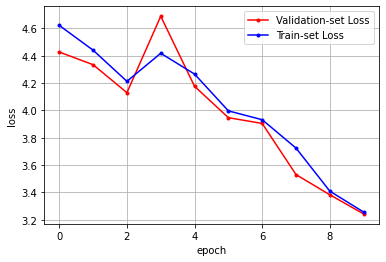

In [16]:
#################### epoch 별 loss 시각화 #################################################
import numpy as np
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [18]:
#Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [19]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you be <end> '

In [ ]:
# embedding_size, maxlen, hidden_size, optimizer